In [2]:
import pandas as pd, matplotlib.pyplot as plt

In [3]:
videoID = "ml6cT4AZdqI" #https://www.youtube.com/watch?v=ml6cT4AZdqI

In [4]:
#Get subtitles & count the words
def getData(videoID):
    from youtube_transcript_api import YouTubeTranscriptApi
    data = YouTubeTranscriptApi.get_transcript(videoID, languages = ['en'])
    df = pd.DataFrame(data)
    compList = list(df['text'].str.split(" "))
    flatList = [item for sublist in compList for item in sublist]
    wordsDF = pd.DataFrame(flatList, columns = ['words'])
    count = wordsDF.words.value_counts().to_frame()
    return count

In [5]:
#Exclude not important words
def filterData(df):
    filt = "and that to those of as it in the one seconds switch you a "
    filt += "we go right and the seconds here you to it a left up"
    filtList = filt.split()
    ret = df[~df.index.isin(filtList)]
    return ret

In [6]:
#Making the chart
def graf(df, n=1):
    top = dataF.head(n)
    plt.style.use('dark_background')
    fig, ax = plt.subplots(figsize = (15,5))
    ax.bar(top.index, top.words, color = 'tab:red')
    plt.xticks()
    return plt

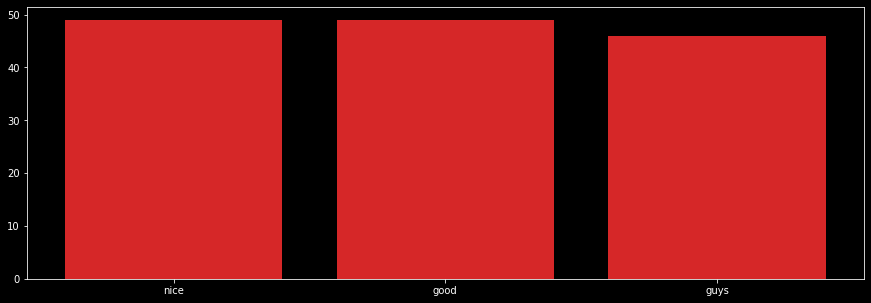

In [7]:
data = getData(videoID)
dataF = filterData(data)
bar = graf(dataF, 3)
bar.show()
dataDict = {}

### All the words the video is mentioning

In [8]:
for idx, row in data.head(200).iterrows():
     dataDict[idx] = row.words
print(dataDict)

{'we': 108, 'go': 107, 'right': 89, 'and': 86, 'the': 82, 'seconds': 82, 'here': 78, 'to': 70, 'you': 70, 'it': 62, 'a': 61, 'left': 52, 'up': 50, 'nice': 49, 'good': 49, 'guys': 46, 'your': 45, 'is': 39, 'gonna': 36, 'so': 34, 'in': 34, 'all': 32, 'one': 32, "we're": 31, 'this': 30, "let's": 30, 'with': 28, 'Reese': 26, 'three': 26, 'I': 26, 'again': 24, 'that': 24, 'two': 24, 'down': 24, 'into': 24, 'back': 23, 'done': 23, 'our': 23, 'through': 23, 'on': 22, 'five': 22, 'got': 22, 'get': 21, 'out': 21, 'move': 20, 'side': 20, 'high': 19, 'do': 19, 'of': 19, 'now': 19, 'come': 18, 'core': 18, 'ten': 17, 'deep': 17, 'for': 17, "I'm": 16, 'perfect': 16, 'find': 15, 'over': 15, 'knees': 15, 'those': 15, 'have': 14, 'arms': 14, 'there': 14, 'feet': 14, "it's": 14, 'want': 14, 'stretch': 13, "you're": 13, 'second': 13, "don't": 13, 'ready': 13, 'doing': 13, 'just': 13, 'okay': 13, 'are': 12, 'modification': 12, 'almost': 12, 'before': 11, 'more': 10, 'if': 10, 'chest': 10, 'breathe': 10, '

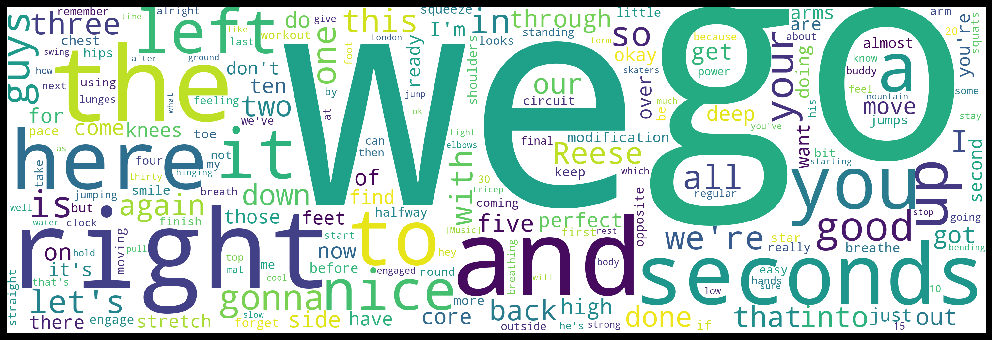

In [9]:
# import sys
# !{sys.executable} -m pip install wordcloud

from wordcloud import WordCloud

wordcloud = WordCloud(background_color='white',
                      width=3000,
                      height=1000
                      ).generate_from_frequencies(dataDict)
# use .generate(space_separated_string) - to generate cloud from text

plt.figure(figsize=(20,6))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()